In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# -------- range of the variables ----------
V_S = 7.0                   # service speed [kn]
range_D     = [0.5, 0.8]
range_AEdAO = [0.3, 1.05]
range_PdD   = [0.5, 1.4]
range_Z     = [2, 7]

# Define the lower and upper bounds for each variable
lower_bounds = [range_D[0], range_AEdAO[0], range_PdD[0]]
upper_bounds = [range_D[1], range_AEdAO[1], range_PdD[1]]

Load files

In [3]:
import csv
from os import chdir

def load_best_result(seed, solver_name):
    filename = dir_name+'best_results_' + str(seed) + '_' + solver_name + '.csv'
    history = []
    with open(filename, 'r', newline='') as file:
        reader = csv.reader(file, delimiter=' ', quotechar='|')
        counter = 0
        for row in reader:
            if counter == 1:
                params = row
            if counter == 3:
                history = row
            counter += 1
    # clean  
    params  = params[0].split(',')
    if len(history) > 0 and len(history[0]) > 2:
        history = history[0].split(',')
        history = [float(h) for h in history]
    D       = float(params[0])
    AEdAO   = float(params[1])
    PdD     = float(params[2])
    Z       = int(params[3]) if len(params[3]) == 1 else int(float(params[3]))
    fitness = float(params[6])

    result = [Z, (D, AEdAO, PdD), fitness, history]
    return result

def get_solver_results(solver_filename):
    results = []
    for seed in range(0, 10):
        result = load_best_result(seed, solver_filename)
        results.append(result)
    return results

In [4]:
dir_name = 'best_results/'

solvers_results = {}

results = get_solver_results('original')
solvers_results["Original"] = results

results = get_solver_results('openaies')
solvers_results["OPENAI-ES"] = results

results = get_solver_results('cmaes')
solvers_results["CMA-ES"] = results

results = get_solver_results('greedy')
solvers_results["Greedy Search"] = results

results = get_solver_results('random')
solvers_results["Random Search"] = results

Compare

In [5]:
# result = [Z, (D, AEdAO, PdD), fitness, [history] ]

solvers_best_fit = {}
for solver_name in solvers_results:
    results     = solvers_results[solver_name]
    best_result = max(results, key=lambda r: r[2]) # get the finess from result
    best_fit    = -best_result[2]
    #
    solvers_best_fit[solver_name] = best_fit

best_fits = [[name, solvers_best_fit[name]] for name in solvers_best_fit]
best_fits.sort(key=lambda x: x[1])
best_fits

[['CMA-ES', 81.40450926220613],
 ['Original', 81.41275874375151],
 ['OPENAI-ES', 81.46421123727845],
 ['Greedy Search', 81.93391047840124],
 ['Random Search', 82.50060710628259]]

In [6]:
# print best of all
best = min(best_fits, key=lambda x: x[1]) 

print('-- Best of all --')
print(best[0])
print('P_B:' , best[1])

-- Best of all --
CMA-ES
P_B: 81.40450926220613


## Grafics

In [7]:
solvers_colors = {'Original':      'purple',
                  'OPENAI-ES':     'blue',
                  'CMA-ES':        'orange',
                  'Greedy Search': 'green',
                  'Random Search': 'red' }

# colors = ['purple','blue','orange','green','red']
labels = [solver_name for solver_name in solvers_results]
labels = [l.replace(' ', '\n') for l in labels]
labels

['Original', 'OPENAI-ES', 'CMA-ES', 'Greedy\nSearch', 'Random\nSearch']

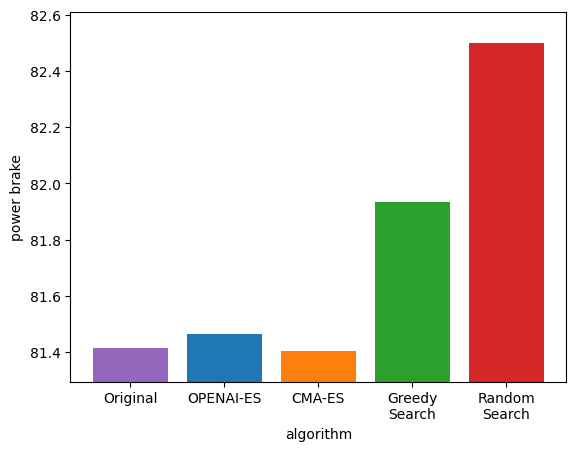

In [8]:
fig, ax = plt.subplots()


counts = [solvers_best_fit[name] for name in solvers_results]
bar_colors = ['tab:'+solvers_colors[name] for name in solvers_results]

ax.bar(labels, counts , color=bar_colors)

ax.set_ylabel('power brake')
ax.set_xlabel('algorithm')

# plt.ylim([80, 90])
dif = abs(min(counts) - max(counts)) / 10
plt.ylim([min(counts)-dif, max(counts)+dif])

plt.show()


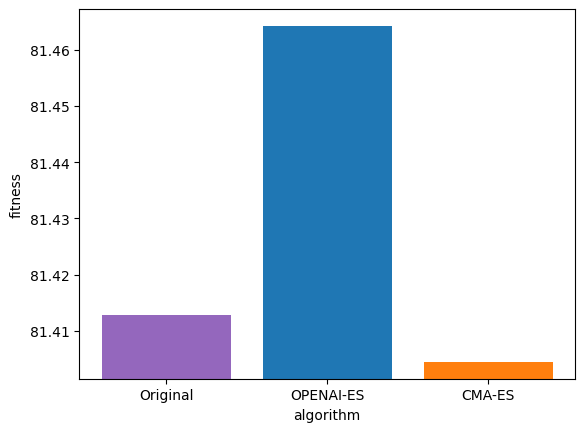

In [9]:
fig, ax = plt.subplots()

counts = counts[:3]
ax.bar(labels[:3], counts, color=bar_colors[:3])

ax.set_ylabel('fitness')
ax.set_xlabel('algorithm')

# plt.ylim([80, 90])
dif = abs(min(counts) - max(counts)) / 20
plt.ylim([min(counts)-dif, max(counts)+dif])

plt.show()


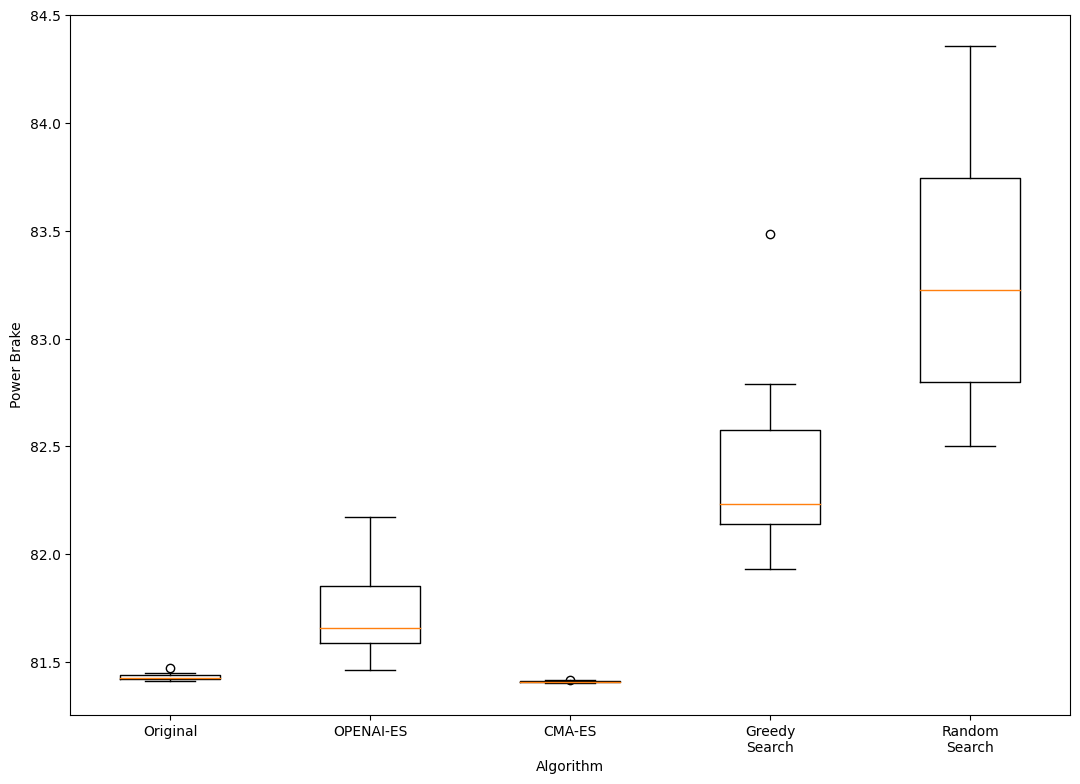

In [14]:
def get_array_fitness(results_list):
    return [-results[2] for results in results_list]

data = [get_array_fitness(solvers_results[name]) for name in solvers_results]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
ax.set_xticklabels(labels)


ax.set(
#     title='Comparison of the best results for minimal power brake',
    xlabel='Algorithm',
    ylabel='Power Brake',
)

# Creating plot
bp = ax.boxplot(data)

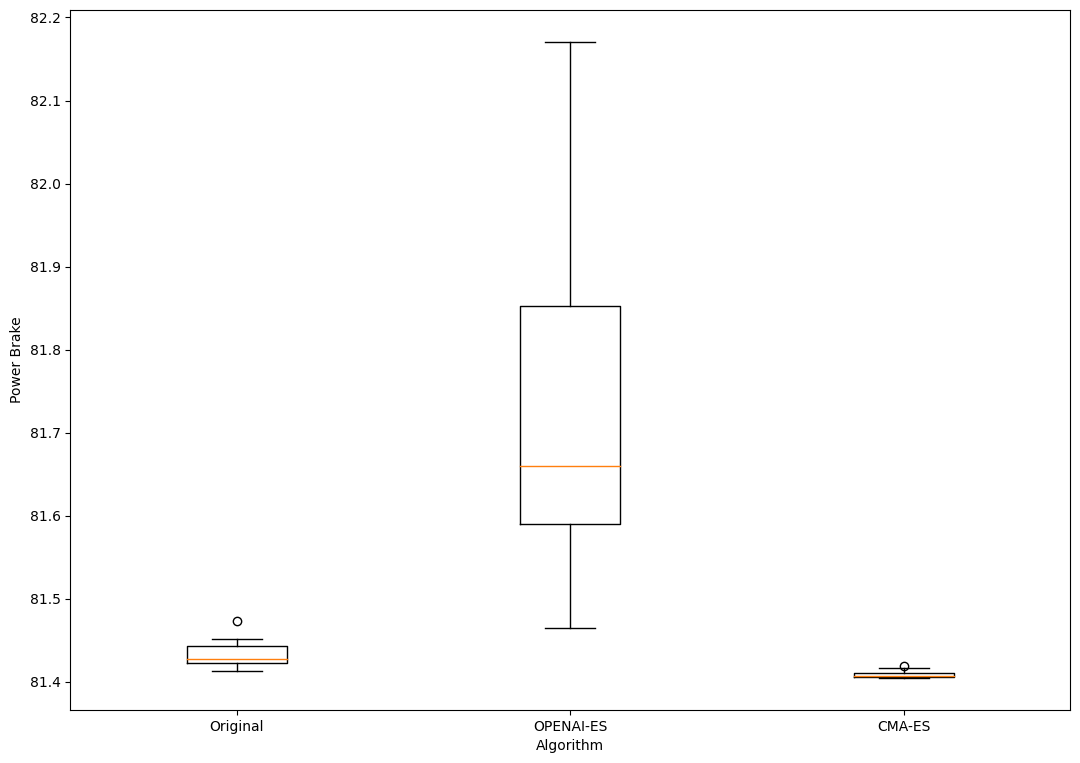

In [11]:
data = data[:3]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
ax.set_xticklabels(labels)
ax.set(
    xlabel='Algorithm',
    ylabel='Power Brake',
)
# Creating plot
bp = ax.boxplot(data)

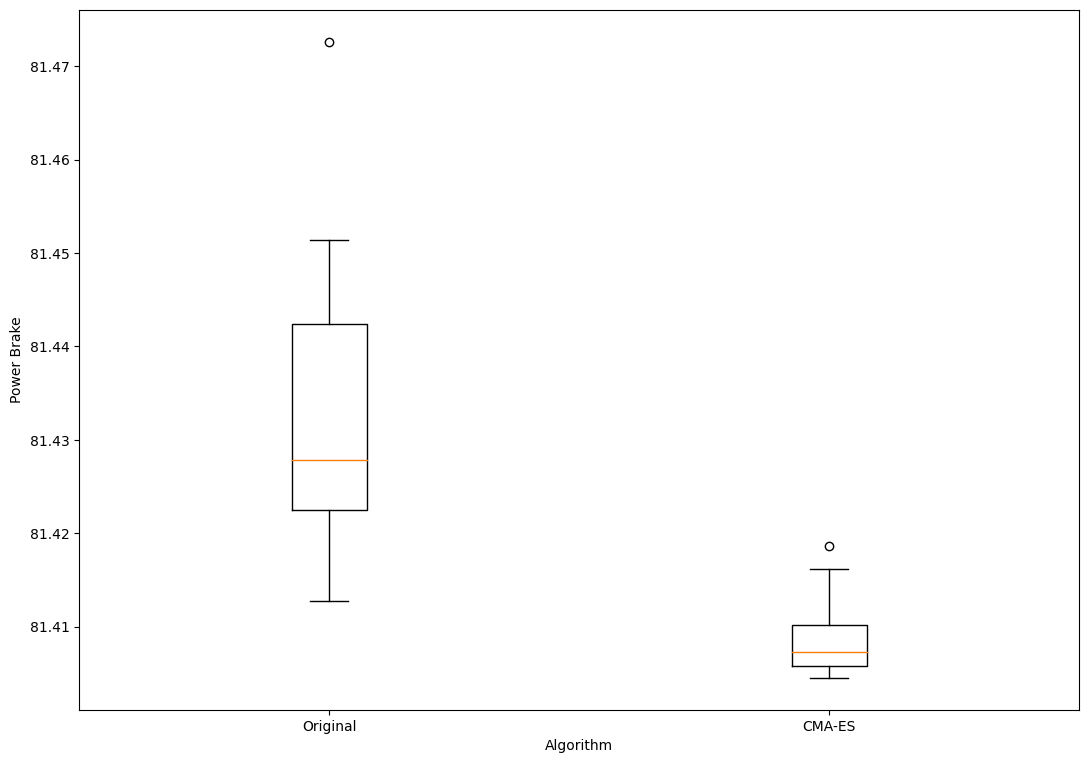

In [12]:

data = [ get_array_fitness(solvers_results['Original']), 
         get_array_fitness(solvers_results['CMA-ES']) ]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
ax.set_xticklabels(['Original', 'CMA-ES'])
ax.set(
    xlabel='Algorithm',
    ylabel='Power Brake',
)
# Creating plot
bp = ax.boxplot(data)

More stuff

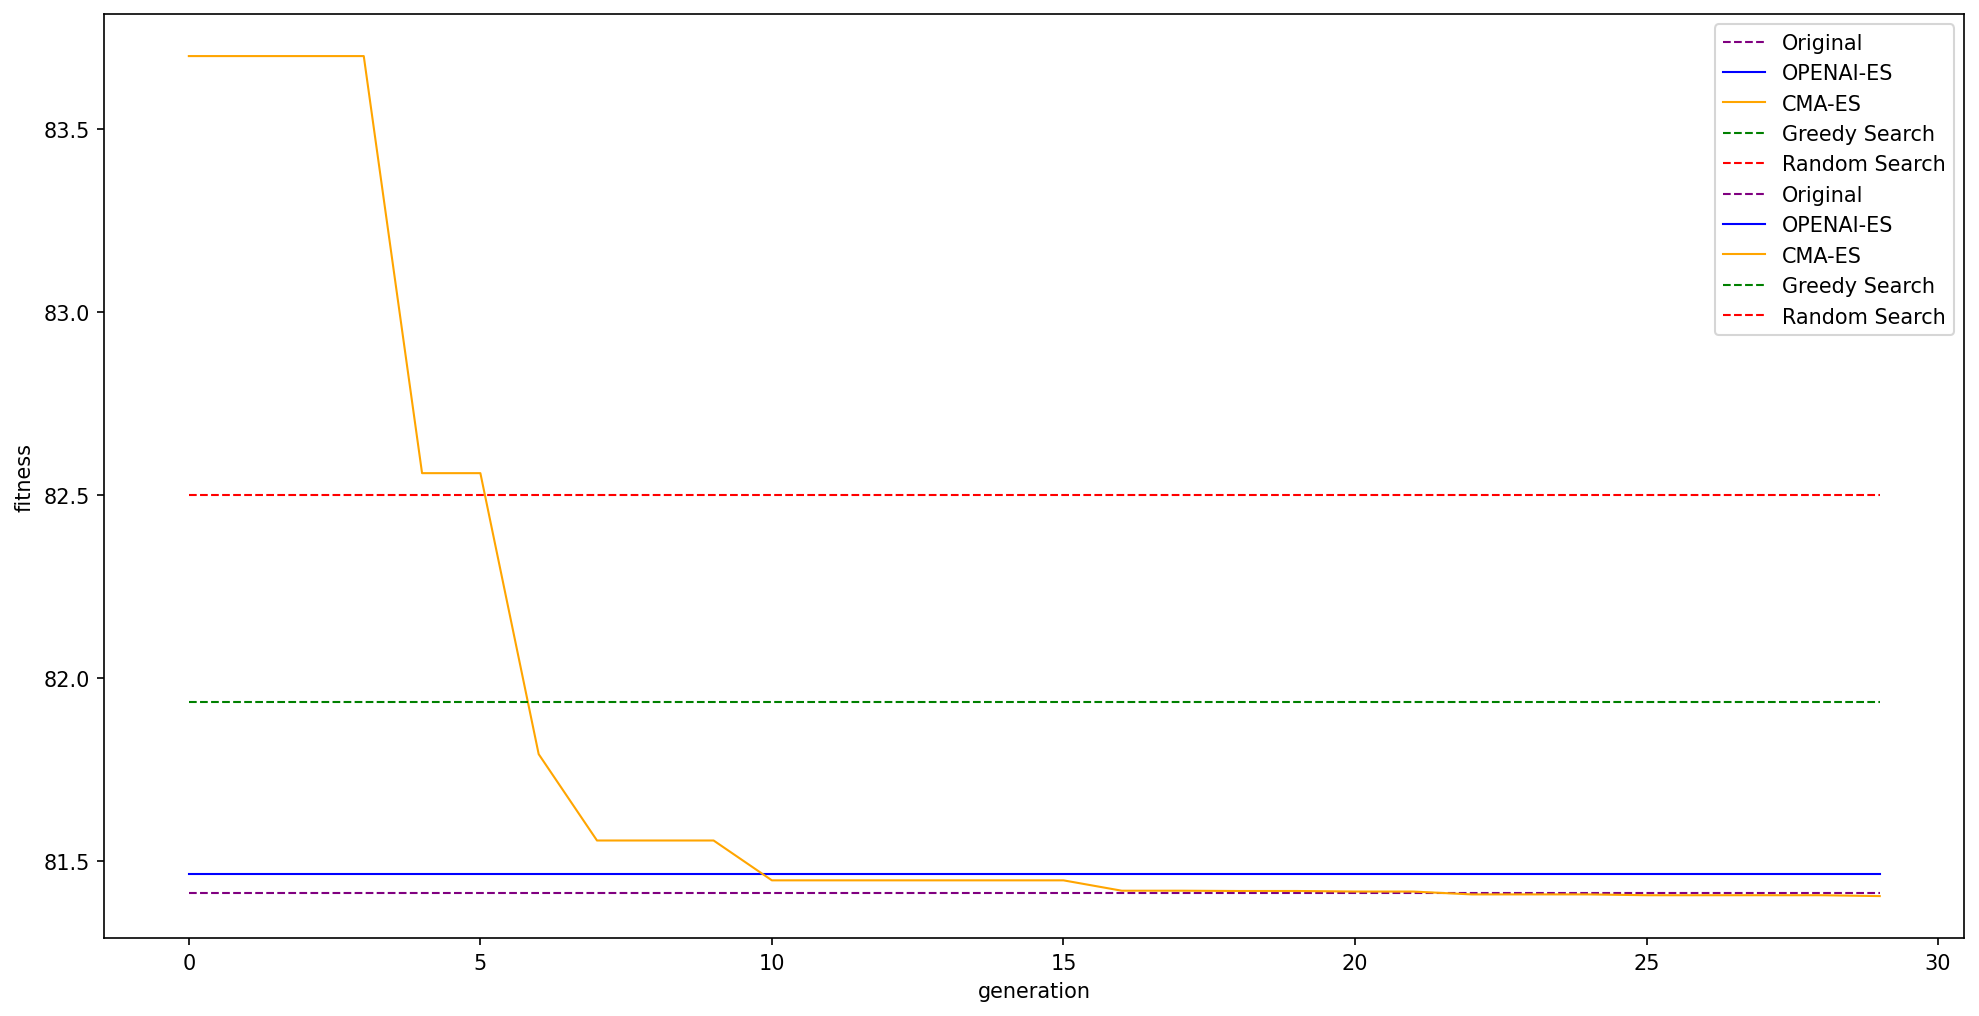

In [18]:
# Create a new figure
plt.figure(figsize=(16,8), dpi=150)

# find the bigest len of history from [all the solvers]
history_size = max([len(solvers_results[name][0][3]) for name in solvers_results])

for solver_name in solvers_results:
    results     = solvers_results[solver_name]
    best_result = max(results, key=lambda r: r[2])
    color = solvers_colors[solver_name]
    label = solver_name
    history = best_result[3]
    linestyle='-'
    # if no history, print straight line
    if len(history) < 2:
        history = [best_result[2] for _ in range(history_size)]        
        linestyle='--'
    history = np.negative(history)
    line, = plt.plot(history, linewidth=1.0,linestyle=linestyle, color=color, label=label) 
    lines.append(line)    
        
plt.legend(handles=lines)

plt.xlabel('generation')
plt.ylabel('fitness')
# 
plt.show()

In [19]:
def show_label():
    print('Algorithms without history:')
    plt.figure(figsize=(3,3), dpi=150)
    lines_fake_label = []
    for solver_name in solvers_results:
        results = solvers_results[solver_name]
        color   = solvers_colors[solver_name]
        label   = solver_name
        
        # print the name of the algorithms without history
        history = results[0][3]
        if len(history) < 2:
            print('-',label)
        else:
            line_fake, = plt.plot([1], linewidth=1.0, color=color, linestyle='--', label=label) 
            lines_fake_label.append(line_fake)
    plt.legend(handles=lines_fake_label)
    plt.show()

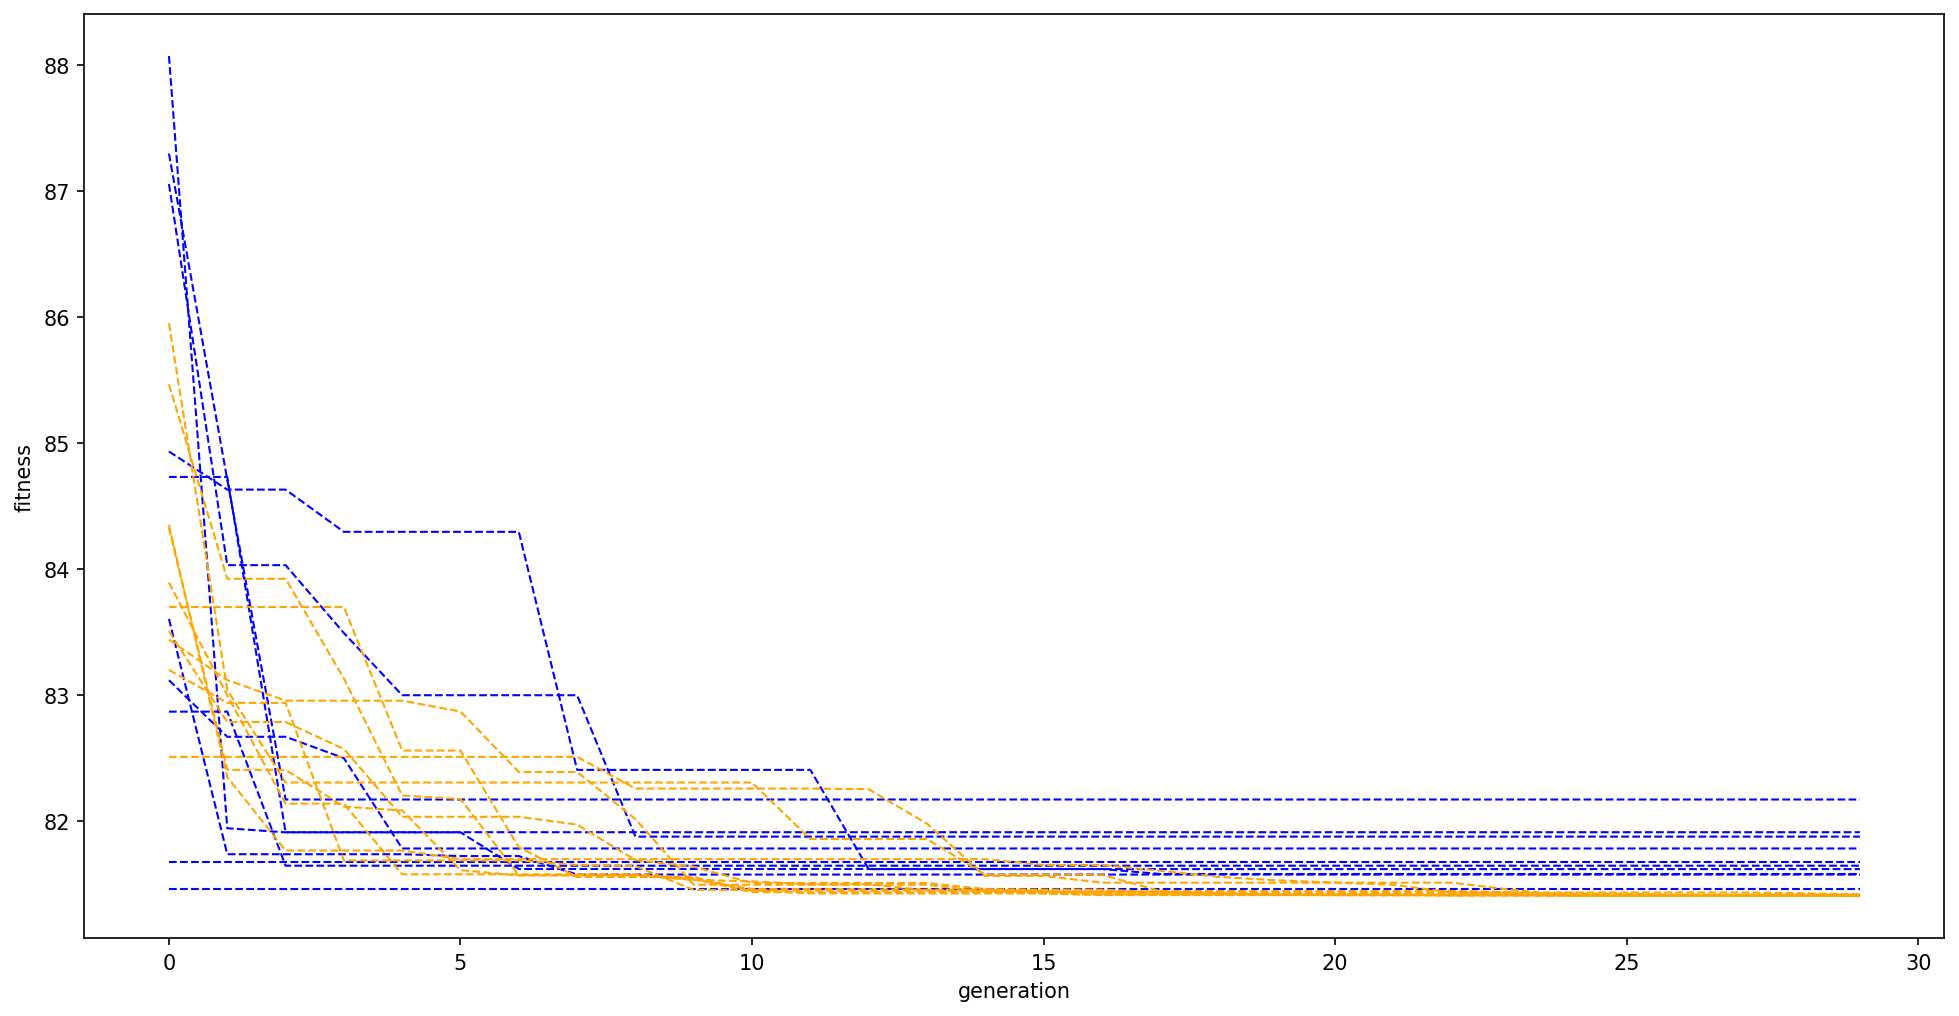

Algorithms without history:
- Original
- Greedy Search
- Random Search


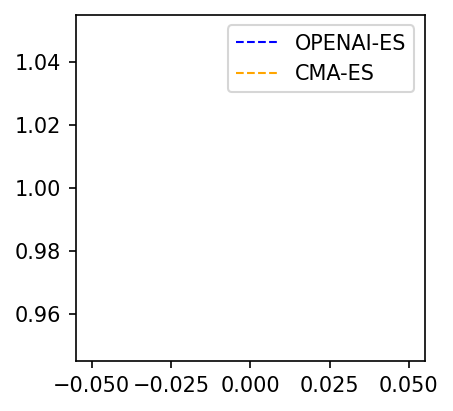

In [22]:
# Create a new figure
plt.figure(figsize=(16,8), dpi=150)

lines = []
for solver_name in solvers_results:
    results = solvers_results[solver_name]
    color   = solvers_colors[solver_name]
    label   = solver_name
    for r in results:
        history = r[3]
        if len(history) > 1:
            history = np.negative(history)
            line, = plt.plot(history, linewidth=1.0, color=color, linestyle='--', label=label) 
            lines.append(line)
        
plt.xlabel('generation')
plt.ylabel('fitness')
# 
plt.show()

show_label()

In [23]:
# result = [Z, (D, AEdAO, PdD), fitness, [history] ]
best_results = []
for solver_name in solvers_results:
    results     = solvers_results[solver_name]
    best_result = max(results, key=lambda r: r[2])
    best_results.append([solver_name, best_result])

# print best of all
best_solver_name, best_result = min(best_results, key=lambda x: x[1]) 

print('-- Best of all --')
print(best_solver_name)

Z             =  best_result[0]
D, AEdAO, PdD =  best_result[1]
P_B           = -best_result[2]

print("D:",D,"Z:",Z,"AEdAO:",AEdAO,"PdD:",PdD)
print("P_B:",P_B)

-- Best of all --
CMA-ES
D: 0.7999982039200102 Z: 5 AEdAO: 0.6322466835365552 PdD: 0.6699619632757269
P_B: 81.40450926220613


In [24]:
def show_img_for_Z(Z_):
    # get the history of Z
    z_history_openaies = [r[3] for r in results_openaies if r[0] == Z_][0]
    z_history_cmaes    = [r[3] for r in results_cmaes    if r[0] == Z_][0]
    # make fitness positive
    z_history_openaies = np.negative(z_history_openaies)
    z_history_cmaes    = np.negative(z_history_cmaes)

    # Create a new figure
    plt.figure(figsize=(16,8), dpi=150)

    line_openaies, = plt.plot(z_history_openaies, linewidth=1.0, label=str(Z_)+' OPENAI-ES')
    line_cmaes,    = plt.plot(z_history_cmaes,    linewidth=1.0, label=str(Z_)+' CMAES')  
    
    plt.legend(handles=[line_openaies, line_cmaes])

    plt.xlabel('generation')
    plt.ylabel('fitness')

    plt.show()
    
# for z in range(range_Z[0], range_Z[1]+1):
#     show_img_for_Z(z)

In [25]:
D     = 0.800
Z     = 5
AEdAO = 0.6053
PdD   = 0.6946

print("Cristopher artigo")
# P_B, n = run_octave_evaluation(V_S, D, Z, AEdAO, PdD)
# cristopher_P_B = P_B
# cristopher_P_B
print(81.36300651084139)

Cristopher artigo
81.36300651084139


In [26]:
# best value for Z, in all runs
data = [solvers_results[name] for name in solvers_results]

big_zs = np.ones(8)
big_zs *= float('inf')
for r_solver in data:
    zs = np.ones(8)
    zs *= float('inf')
    for r in r_solver:
        z = r[0]
        fit = -r[2]
        zs[z] = min(zs[z], fit)
    for z in range(8):
        big_zs[z] = min(zs[z], big_zs[z])
        
# print Z and best fitness, if found a fitness for that Z
for z in range(8):
    if big_zs[z] != 0 and big_zs[z] != float('inf'):
        print('Z:',z, 'fit:',big_zs[z])

Z: 4 fit: 82.78937270234336
Z: 5 fit: 81.40450926220613
Z: 6 fit: 81.78238242745375
Z: 7 fit: 83.2782896364101
